# Описание проекта


Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. 
Необходимо выявить определяющие успешность игры закономерности. Это позволит понять какой продукт лучше, и компания сможет спланировать рекламные кампании.



## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import seaborn as sns

In [2]:
data=pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
# общая  информация о таблице:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод

Пропуски в столбцах

- name               2
- year_of_release    269
- critic_score       8578
- user_score         6701
- rating             6766


Также в столбце 'user_score' имеются оценки 'tbd' , неопределенные оценки, я полагаю, удалить их нельзя, заполним NaN данные строчки.
Поменяем типы данных в столбцах `year_of_release` на целочисленный, `user_score` на тип float.

Большое кол-во пропусков в столбцах `critic_score`, `user_score`, `rating`, думаю, из-за того, что в более ранние года еще не было рейтингов и оценок, а так же имеются пропуски и в 2000-х годах, там где продаж не было по данным играм, поэтому и ставить оценки было некому.

Пропуски оставим как есть, так как мы не знаем, чем их заполнять.

Приведем названия колонок в общему нижнему регистру.


## Предобработка данных

In [7]:
# подсчёт явных дубликатов
print("Количество дубликатов: {}".format(data.duplicated().sum()))

Количество дубликатов: 0


In [8]:
# приведем названия к нижнему регистру:
data.columns=map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
#Поменяем значение tbd на Nan в столбце 'user_score':
data['user_score']=data['user_score'].replace('tbd', np.nan)
data['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.6      2
9.6      2
0.9      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [10]:
#заполнила значением 'unknown' пропуски в столбце rating
data['rating']=data['rating'].fillna('unknown')
data['rating'].value_counts()

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
RP            3
K-A           3
AO            1
Name: rating, dtype: int64

In [11]:
# Поменяем типы данных в столбцах `year_of_release`, `user_score`:
data['user_score'] = data['user_score'].astype('float64')
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [12]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


### Вывод: 

Типы данных изменили, к нижнему регистру названия колонок привели, столбец с общими продажами по всем регионам в таблицу добавили.

## Исследовательский анализ данных

•	Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?



In [13]:
data['name'].value_counts()

Need for Speed: Most Wanted                                      12
Madden NFL 07                                                     9
Ratatouille                                                       9
LEGO Marvel Super Heroes                                          9
FIFA 14                                                           9
                                                                 ..
Rollcage                                                          1
Dragon Ball Heroes: Ultimate Mission                              1
Metal Fight Beyblade Portable: Chouzetsu Tensei Vulcan Horses     1
Big Brain Academy                                                 1
My Baby Girl                                                      1
Name: name, Length: 11559, dtype: int64

,year_of_release,count
count,37.000000,37.000000
mean,1998.000000,444.432432
std,10.824355,451.604334
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,762.000000
max,2016.000000,1427.000000


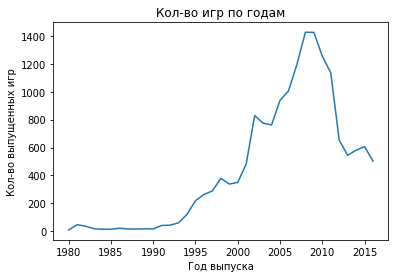

In [14]:
release_game=data\
    .pivot_table(index='year_of_release', values='name', aggfunc='count') \
    .rename(columns={'name':'count'}) \
    .sort_values('count', ascending=False) \
    .reset_index()
sns.lineplot(x='year_of_release',y='count', data=release_game)
plt.title("Кол-во игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Кол-во выпущенных игр");
release_game.describe()

Как показывает графика , с 1980 по 1995 гг выпускалось незначительно кол-во игр.Значительный рост наблюдается с 2000 по 2009 гг.

•Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

•	Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


In [15]:
platform_sales=data\
    .pivot_table(index='platform', values='total_sales', aggfunc='sum') \
    .sort_values('total_sales', ascending=False) \
    .reset_index() 

platform_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


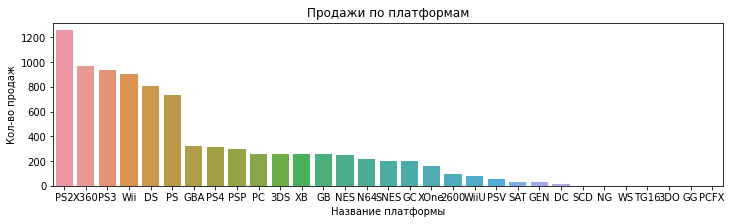

In [16]:
#построим график Продаж по платформам
plt.figure(figsize=(12,3))
sns.barplot(x='platform',y='total_sales', data=platform_sales)
plt.title("Продажи по платформам")
plt.xlabel("Название платформы")
plt.ylabel("Кол-во продаж");

Как показывает графика ,самые крупные платформы по продажам это  PS2,X360,PS3,Wii,DS,PS.

In [17]:
#выведем топ-6 платформ по продажам:
top_platform_sales=data\
    .pivot_table(index='platform', values='total_sales', aggfunc='sum') \
    .sort_values('total_sales', ascending=False) \
    .reset_index() \
    .head(6)
top_platform_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


In [18]:
top_platform=data.query('platform in @top_platform_sales.platform') \
    .groupby(['year_of_release','platform']) \
    .agg({'total_sales':'count'})
top_platform

total_sales
year_of_release platform             
1985            DS                  1
1994            PS                 17
1995            PS                 99
1996            PS                164
1997            PS                188
...                               ...
2015            Wii                 4
                X360               35
2016            PS3                38
                Wii                 1
                X360               13

[67 rows x 1 columns]

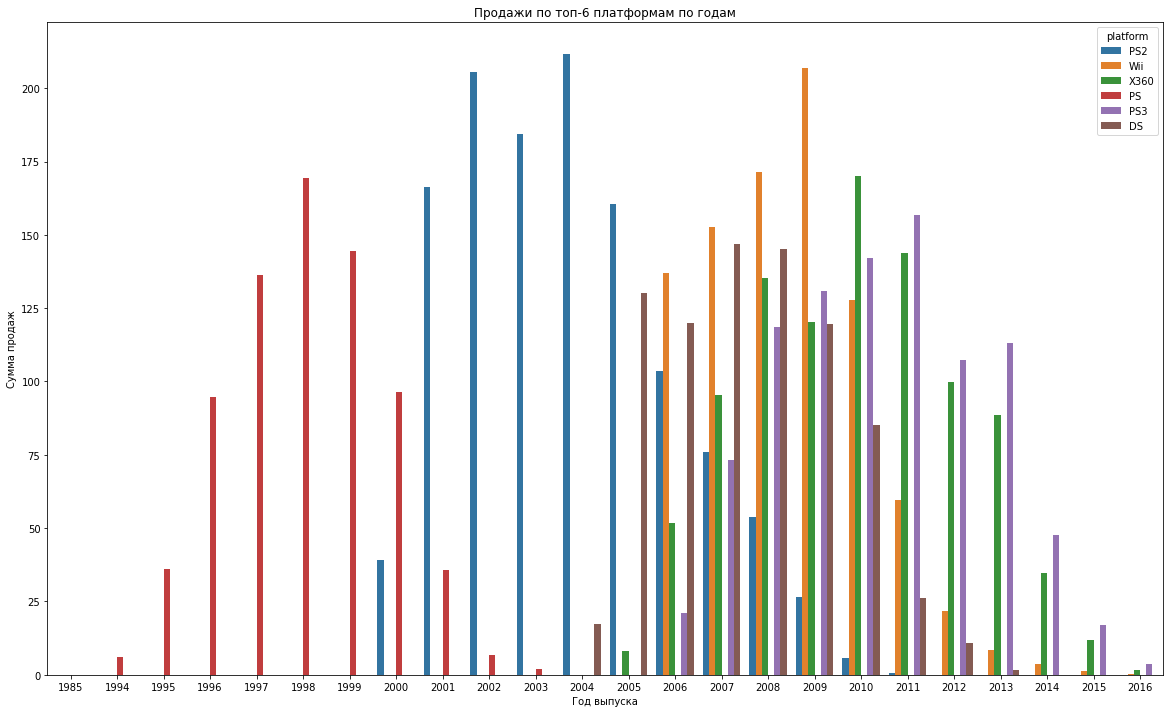

In [19]:
top_platform=data.query('platform in @top_platform_sales.platform') \
    .groupby(['year_of_release','platform']) \
    .agg({'total_sales':'sum'}) \
    .sort_values('total_sales', ascending=False) \
    .reset_index() 
plt.figure(figsize=(20,12))
sns.barplot(x='year_of_release',y='total_sales', hue='platform', data=top_platform)
plt.title("Продажи по топ-6 платформам по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж");

Судя по графику, платформа в среднем живет 10 лет, и потом потухает.с 2000 г каждые 6 лет появлялась новая игра, с 2005 г каждый год начали выпускать новые игры. 

c 1985 по 2005  гг данные по играм можно считать устаревшими, для дальнейшего анализа выделим год 2013-2016 гг.

In [20]:
#сделаем срез по году выпуску игр с 2012г:

updated_data=data\
    .query('year_of_release>=2013')
updated_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


• Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


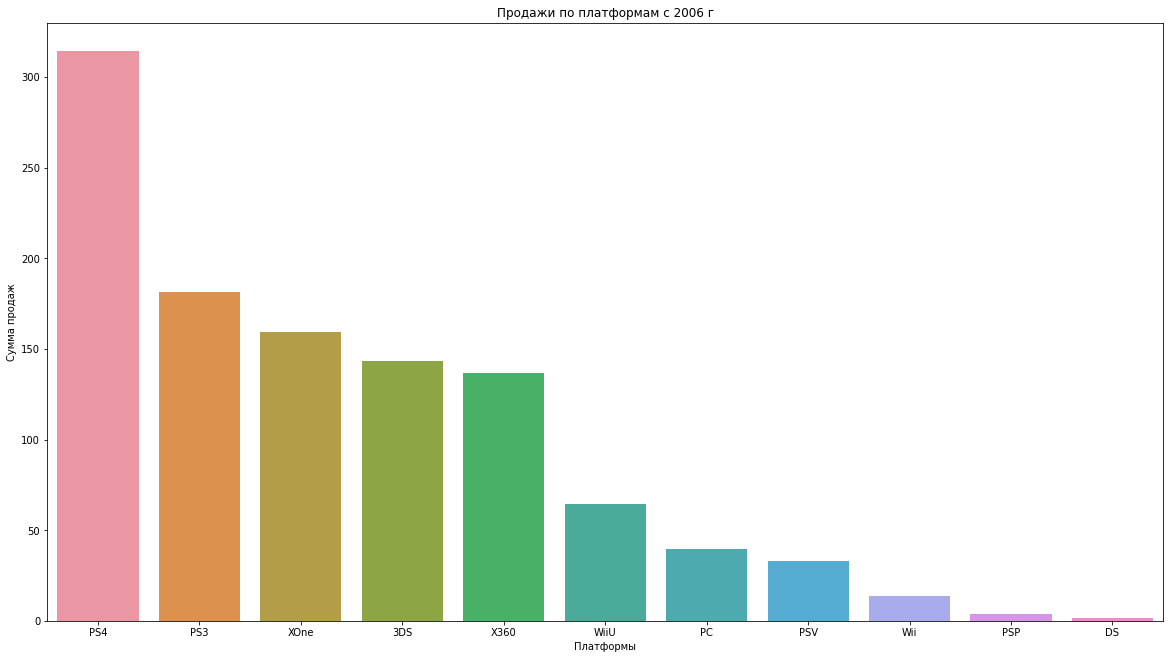

In [21]:
# построим сводную таблицу и посмотрим какие платформы теперь лидируют:
df=updated_data \
    .pivot_table(index=['platform'], values='total_sales', aggfunc='sum') \
    .sort_values('total_sales', ascending=False) \
    .reset_index()
plt.figure(figsize=(20,11))
sns.barplot(x='platform',y='total_sales',data=df)
plt.title("Продажи по платформам с 2006 г")
plt.xlabel("Платформы")
plt.ylabel("Сумма продаж");
df

Согласно графику, выделим топ-10 платформ по продажам  PS4,PS3,XOne,3DS,X360,WiiU,PC,PSV,Wii,PSP.

In [22]:
#топ-10 платформ:
top_10_platform_sales=df.head(10)
top_10_platform_sales

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


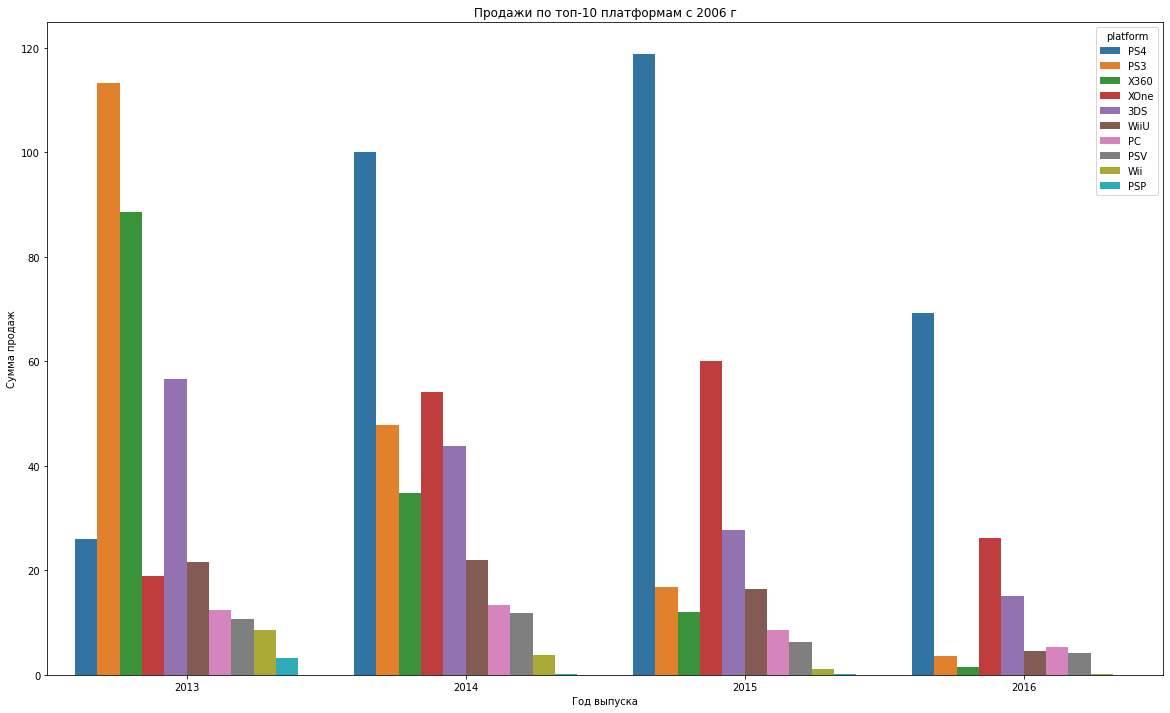

In [23]:
# построим график и посмотрим какие платформы лидируют по продажам:
top_10_platform=updated_data.query('platform in @top_10_platform_sales.platform') \
    .groupby(['year_of_release','platform']) \
    .agg({'total_sales':'sum'}) \
    .sort_values('total_sales', ascending=False) \
    .reset_index() 
plt.figure(figsize=(20,12))
sns.barplot(x='year_of_release',y='total_sales', hue='platform', data=top_10_platform)
plt.title("Продажи по топ-10 платформам с 2006 г")
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж");


По графику видно, что по суммарным продажам Активными платформами являются PS4,XOne. И спад по проадажам только начинается, А это значит в 2017 г должны появится новые платформы.

• Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [24]:
#обновим датасет , сделаем срез год выпуска с 2013 г, и топ-10 платформ по продажам:
new_data=updated_data.query('year_of_release>=2013 and platform in @top_10_platform_sales.platform')
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


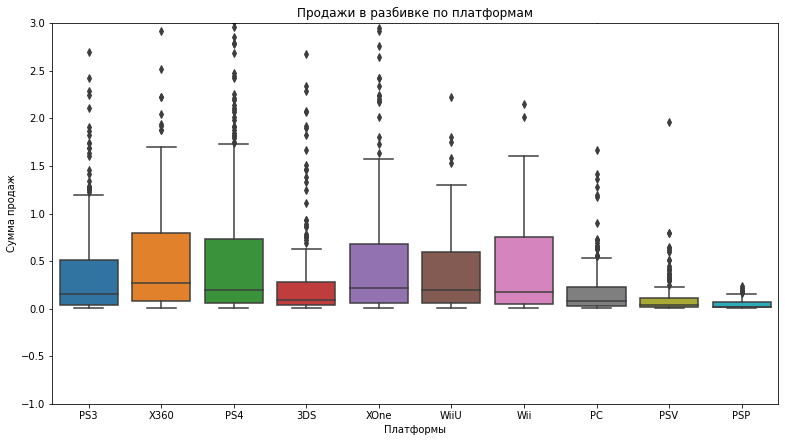

In [25]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:
plt.figure(figsize=(13,7))
plt.ylim(-1,3)
sns.boxplot(x='platform',y='total_sales',data=new_data);
plt.title("Продажи в разбивке по платформам")
plt.xlabel("Платформы")
plt.ylabel("Сумма продаж");

In [26]:
new_data.query('platform =="X360"')['total_sales'].describe()


count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

In [27]:
new_data.query('platform =="Wii"')['total_sales'].describe()

count    23.000000
mean      0.593913
std       0.915432
min       0.010000
25%       0.045000
50%       0.180000
75%       0.755000
max       3.580000
Name: total_sales, dtype: float64

In [28]:
new_data.query('platform =="PS4"')['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [29]:
new_data.query('platform =="XOne"')['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

Про графику можно сказать, что платформы X360,Wii очень схожи между собой,медианные значения практически на одном уровне и межквартальный размах.То же самое можно сказать о платформах PS4,XOne.

•  Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Возьмем саму акутальную на 2016 г платформу PS4 и построим сводную таблицу и  диграмму рассеивания. 

In [30]:
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [31]:
PS4_data=new_data \
    .query('platform=="PS4"')
PS4_data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


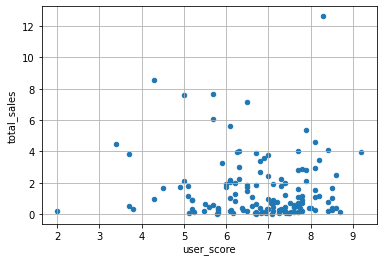

In [32]:
# построим диаграмму рассеивания и изучим зависимость total_sales и user_score:
new_data \
    .query('platform=="PS4"') \
    .pivot_table(index='total_sales', values='user_score') \
    .reset_index() \
    .plot(x='user_score', y='total_sales', kind='scatter', grid=True);

In [33]:
#посчитаем кофф корреляции:
PS4_data['total_sales'].corr(PS4_data['user_score'])

-0.031957110204556424

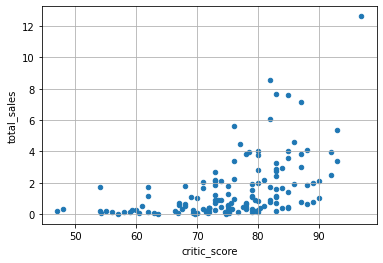

In [34]:
# построим диаграмму рассеивания и изучим зависимость total_sales и critic_score:
new_data \
    .query('platform=="PS4"') \
    .pivot_table(index='total_sales', values='critic_score') \
    .reset_index() \
    .plot(x='critic_score', y='total_sales', kind='scatter', grid=True);

In [35]:
#посчитаем кофф корреляции:
PS4_data['total_sales'].corr(PS4_data['critic_score'])

0.406567902061781

связь между продажами и оценками критиков намного сильнее, чем между оценками пользователей. Скорее всего люди покупая, доверяют больше профессиональным оценщикам, нежели народу.

• Соотнесите выводы с продажами игр на других платформах.



In [36]:
#Напишем функцию для подсчета корреляции и диаграммы рассеивания:
def others_platforms(name):
    platform = new_data[new_data['platform']==name]
    f, ax = plt.subplots(1 ,2, figsize=(13,4))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
   
    plt.show()
    
    user_corr = platform['user_score'].corr(platform['total_sales'])
    critic_corr = platform['critic_score'].corr(platform['total_sales'])
    print(user_corr)
    print(critic_corr)

In [37]:
#сохраним список из топ-5 платформ:
top_5 = ['PS4','PS3','XOne','3DS','X360']

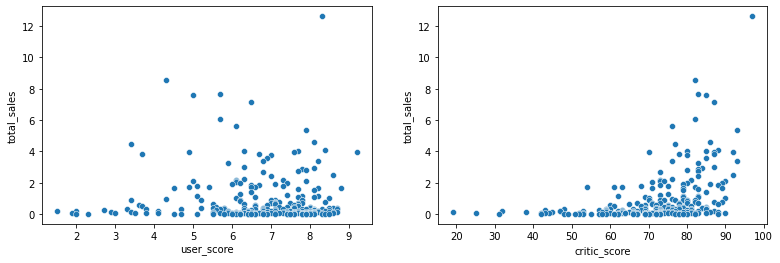

-0.031957110204556424
0.40656790206178095


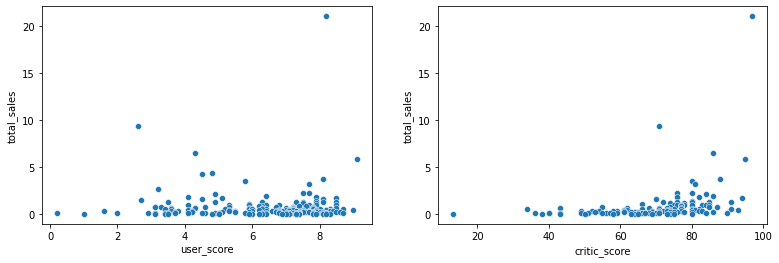

0.0023944027357566925
0.3342853393371919


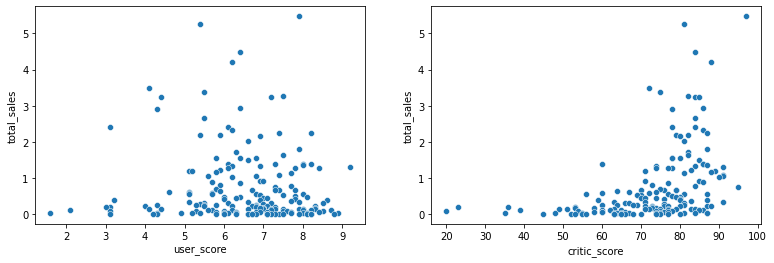

-0.06892505328279414
0.4169983280084017


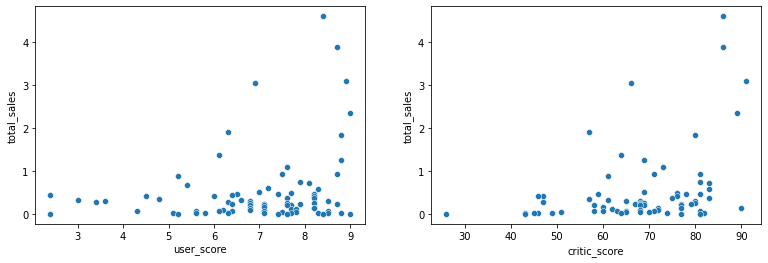

0.24150411773563016
0.3570566142288103


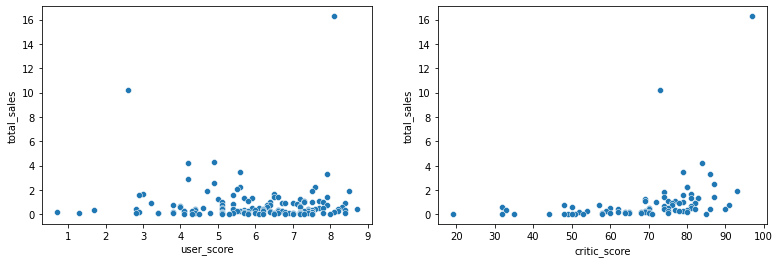

-0.011742185147181342
0.3503445460228664


In [38]:
#С помощью цикла выведем все  графиков
for platform in top_5:
    others_platforms(platform)

Похожая корреляция с предыдущей платформой PS4, почти у всех платформ 'PC','XOne',кроме одной платформы '3DS' связь прослеживаетя сильнее. Продажи зависят от оценок критиков, а оценки пользователей не влияют на продажи. 

• Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [39]:
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [40]:
new_data \
    .pivot_table(index=['genre'], values='total_sales', aggfunc='sum') \
    .sort_values('total_sales', ascending=False) 

,total_sales
genre,
Action,321.37
Shooter,232.98
Sports,150.62
Role-Playing,145.89
Misc,62.74
Platform,41.94
Racing,39.89
Fighting,35.31
Adventure,23.61


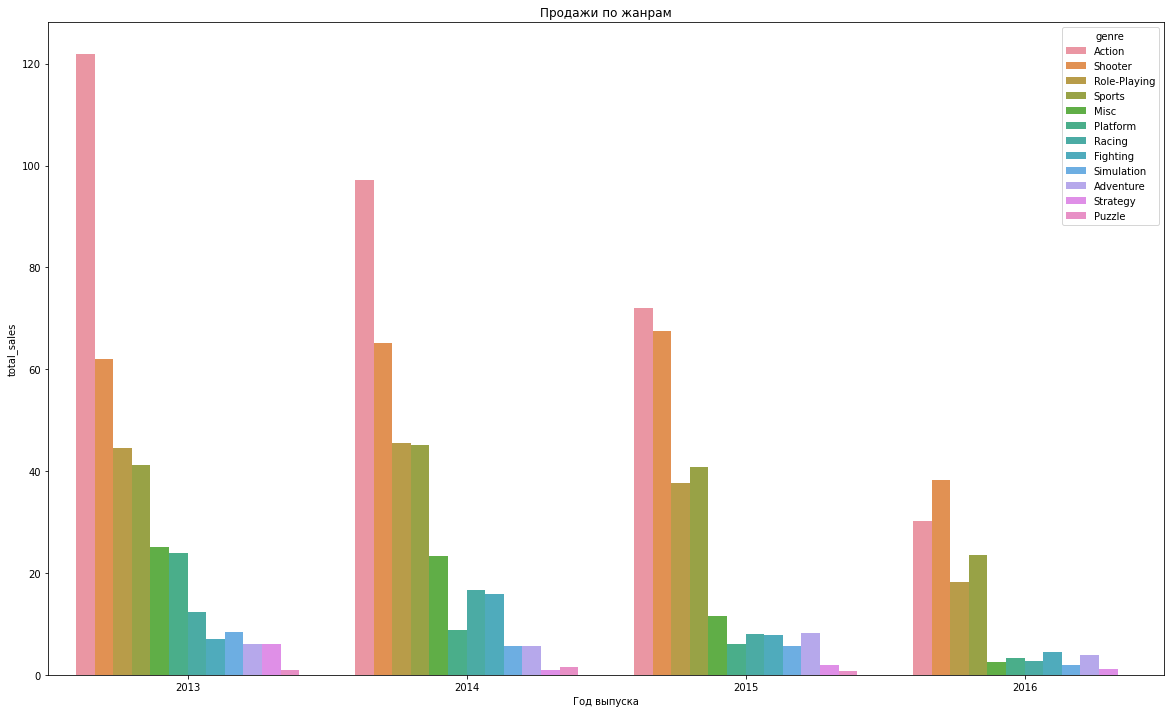

In [41]:
# построим сводную таблицу и посмотрим какие жанры лидируют по продажам:
genre_sales=new_data \
    .groupby(['year_of_release','genre']) \
    .agg({'total_sales':'sum'}) \
    .sort_values('total_sales', ascending=False) \
    .reset_index() 
plt.figure(figsize=(20,12))
sns.barplot(x='year_of_release',y='total_sales', hue='genre', data=genre_sales)
plt.title("Продажи по жанрам")
plt.xlabel("Год выпуска");


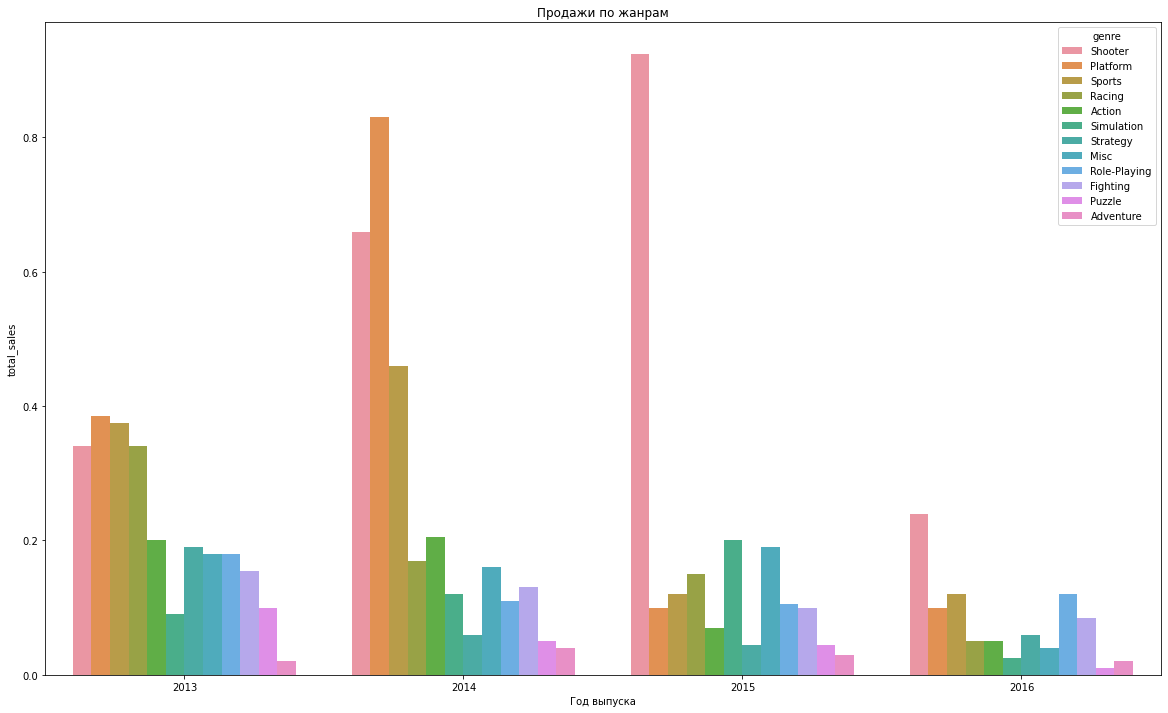

In [42]:
# построим сводную таблицу и посмотрим какие жанры лидируют по продажам:
genre_sales=new_data \
    .groupby(['year_of_release','genre']) \
    .agg({'total_sales':'median'}) \
    .sort_values('total_sales', ascending=False) \
    .reset_index() 
plt.figure(figsize=(20,12))
sns.barplot(x='year_of_release',y='total_sales', hue='genre', data=genre_sales)
plt.title("Продажи по жанрам")
plt.xlabel("Год выпуска");


Судя по графику лидирующими жанрами по продажам являются следующие жанры: Action,Shooter,Role-Playing,Sports,Misс.Акутуально лидирующим к 2016 году остается Shooter. 

Отстают в продажах Puzzle,
Strategy.

### Вывод: 

Значительный рост по выпуску игр наблюдается с 2000 по 2009 гг

Выяснили, что \платформа в среднем живет 10 лет.С 2000 г каждые 6 лет появлялась новая игра, с 2005 г каждый год начали выпускать новые игры. 

Выделили  топ-10 платформ по продажам PS4,PS3,XOne,3DS,X360,WiiU,PC,PSV,Wii,PSP.

Продажи напрямую зависят от оценок критиков, а оценки пользователей не влияют на продажи.

Лидируют жанры по продажам :  Shooter, Platform,Sports, Racing, Action.
Отстают в продажах Puzzle, Adventure.

## Составить портрет пользователя каждого региона


Определить для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [43]:
new_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Найдем популярные платформы (топ-5) в NA.

In [44]:
#построим сводную таблицу суммарных продаж топ-5 платформ в NA  и посчитаем долю этих продаж: 

na_sales_platform=new_data \
    .pivot_table(index='platform', values=['na_sales'], aggfunc='sum') \
    .sort_values('na_sales', ascending=False) 
na_sales_platform


,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [45]:
new_data['na_sales'].sum()

437.14000000000004

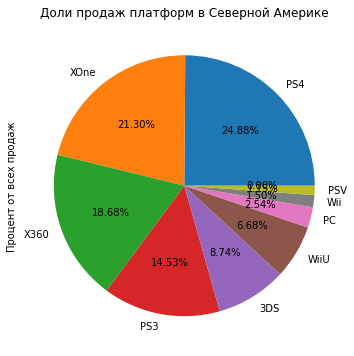

In [46]:
#найдем суммарные продажи всех платформ в Северной Америке и доли от этих продаж:
sum_na_sales=new_data['na_sales'].sum()
ratio_na_sales=round((na_sales_platform['na_sales']/sum_na_sales).mul(100),2)
ratio_na_sales.plot(kind='pie', autopct='%1.2f%%', figsize =(6,6),subplots=True)
plt.title('Доли продаж платформ в Северной Америке')
plt.ylabel('Процент от всех продаж')
plt.show();

Топ-5 платформ по продажам в Северной Америке:`X360,Wii,PS3,DS,PS2`. Доля продаж `X360` составляю четверть от всех продаж, а  доля продаж платформы `PS2` всего 5 %, хотя и находится в пятерке лучших.

In [47]:
#построим сводную таблицу продаж в NA жанров игр:
na_sales_genre=new_data \
    .pivot_table(index='genre', values=['na_sales'], aggfunc='sum') \
    .sort_values('na_sales', ascending=False) 

na_sales_genre

,na_sales
genre,
Action,125.83
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.46
Platform,17.93
Fighting,15.55
Racing,12.96
Adventure,7.14


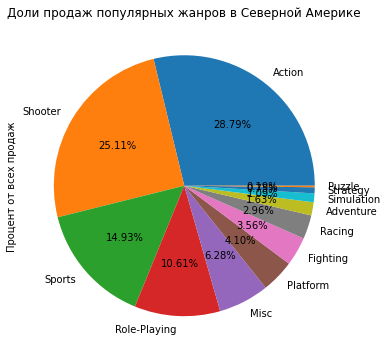

In [48]:
#найдем доли продаж разных жанров в Северной Америке:
ratio_na_genre=round((na_sales_genre['na_sales']/sum_na_sales).mul(100),2)
ratio_na_genre.plot(kind='pie', autopct='%1.2f%%', figsize =(6,6),subplots=True)
plt.title('Доли продаж популярных жанров в Северной Америке')
plt.ylabel('Процент от всех продаж')
plt.show();

Топ-5 жанров по продажам в Северной Америке:`Action,Sports,Shooter,Misc,Role-Playing`. Доля продаж жанра `Action` составляет 22%, а `Role-Playing` всего 9%.

Для того, чтобы посмотреть влияет ли рейтинг ESRB на продажи в отдельном регионе, расшифруем каждую букву рейтинга:

M - 15+

E - 6+ (everyone)

T - 13+

E10+ - 10+

EC - 3+

RP - pending

In [49]:
#построим сводную таблицу продаж в NA в зависимости от рейтинга:
na_sales_rating=new_data \
    .pivot_table(index='rating', values=['na_sales'], aggfunc='sum') \
    .sort_values('na_sales', ascending=False) 
na_sales_rating

,na_sales
rating,
M,165.21
unknown,89.18
E,78.94
E10+,54.02
T,49.79


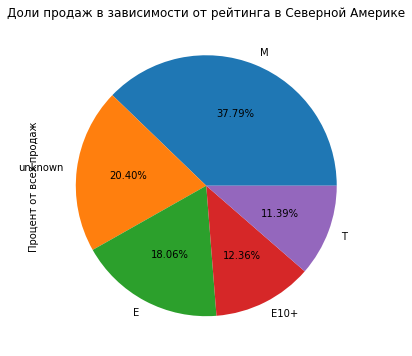

In [51]:
#найдем доли продаж  в Северной Америке в зависимости о рейтнга:
ratio_na_rating=round((na_sales_rating['na_sales']/sum_na_sales).mul(100),2)
ratio_na_rating.plot(kind='pie', autopct='%1.2f%%', figsize =(6,6),subplots=True)
plt.title('Доли продаж в зависимости от рейтинга в Северной Америке')
plt.ylabel('Процент от всех продаж');

Больше всего продаются игры с рейтингом 15+  38 %, так же хорошо продаются игры без рейтинга 20% и игры 6+. 

In [52]:
#построим сводную таблицу продаж платформ в EU:

eu_sales_platform=new_data \
    .pivot_table(index='platform', values=['eu_sales'], aggfunc='sum') \
    .sort_values('eu_sales', ascending=False) 
eu_sales_platform

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


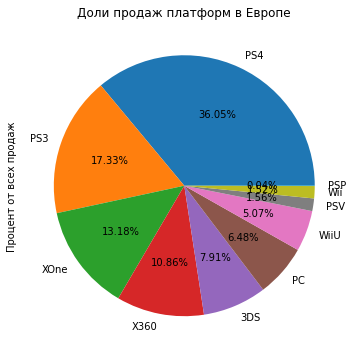

In [53]:
#найдем суммарные продажи всех платформ в Европе и доли от этих продаж:
sum_eu_sales=new_data['eu_sales'].sum()
ratio_eu_sales=round((eu_sales_platform['eu_sales']/sum_eu_sales).mul(100),2)
ratio_eu_sales.plot(kind='pie', autopct='%1.2f%%', figsize =(6,6),subplots=True)
plt.title('Доли продаж платформ в Европе')
plt.ylabel('Процент от всех продаж')
plt.show();

Топ-5 платформ по продажам в Европе очень схож с плаформами в Северной Америке:`X360,Wii,PS3,DS`, только вместо платформы `PS2`, платформа `PS4`.

In [54]:
#построим сводную таблицу продаж в Европе жанров игр:
eu_sales_genre=new_data \
    .pivot_table(index='genre', values=['eu_sales'], aggfunc='sum') \
    .sort_values('eu_sales', ascending=False) 

eu_sales_genre

,eu_sales
genre,
Action,117.89
Shooter,87.86
Sports,60.49
Role-Playing,36.97
Racing,20.19
Misc,20.00
Platform,15.15
Simulation,10.84
Fighting,8.55


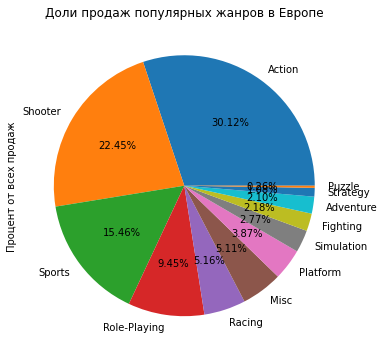

In [55]:
#найдем доли продаж разных жанров в Европе:
ratio_eu__genre=round((eu_sales_genre['eu_sales']/sum_eu_sales).mul(100),2)
ratio_eu__genre.plot(kind='pie', autopct='%1.2f%%', figsize =(6,6),subplots=True)
plt.title('Доли продаж популярных жанров в Европе')
plt.ylabel('Процент от всех продаж')
plt.show();

Топ-5 жанров по продажам в Европе очень схож с жанрами в Северной Америке :`Action,Sports,Shooter,Misc,Racing`. Доля продаж жанра `Action` составляет 23%, а `Racing` 7,49%,  делят пятое место с жанром `Role-Playing` всего 7,47%.

In [56]:
#построим сводную таблицу продаж в Европе в зависимости от рейтинга:
eu_sales_rating=new_data \
    .pivot_table(index='rating', values=['eu_sales'], aggfunc='sum') \
    .sort_values('eu_sales', ascending=False) 
eu_sales_rating

,eu_sales
rating,
M,145.32
E,82.97
unknown,78.61
E10+,42.53
T,41.95


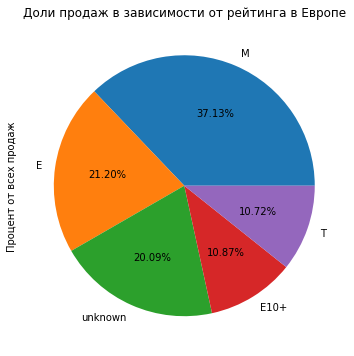

In [57]:
#найдем доли продаж  в Европе в зависимости о рейтинга:
ratio_eu_rating=round((eu_sales_rating['eu_sales']/sum_eu_sales).mul(100),2)
ratio_eu_rating.plot(kind='pie', autopct='%1.2f%%', figsize =(6,6),subplots=True)
plt.title('Доли продаж в зависимости от рейтинга в Европе')
plt.ylabel('Процент от всех продаж');

Продажи по категориям в Европе схож с продажами в Северной Америке.Продаются игры с рейтингом 15+ 37 %, так же хорошо продаются для возрастных категорий 6+ и 20 % составляют игры без рейтингов. 

In [58]:
#построим сводную таблицу продаж платформ в Jp:

jp_sales_platform=new_data \
    .pivot_table(index='platform', values=['jp_sales'], aggfunc='sum') \
    .sort_values('jp_sales', ascending=False) 
jp_sales_platform

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


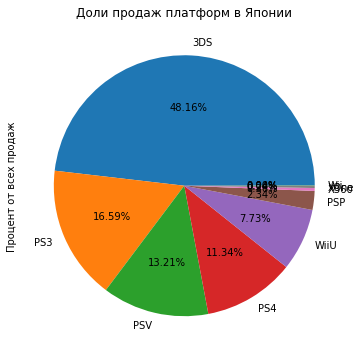

In [59]:
#найдем суммарные продажи всех платформ в Японии  и доли от этих продаж:
sum_jp_sales=new_data['jp_sales'].sum()
ratio_jp_sales=round((jp_sales_platform['jp_sales']/sum_jp_sales).mul(100),2)
ratio_jp_sales.plot(kind='pie', autopct='%1.2f%%', figsize =(6,6),subplots=True)
plt.title('Доли продаж платформ в Японии')
plt.ylabel('Процент от всех продаж')
plt.show();

Топ-5 платформ по продажам в Японии:`DS,3DS,PS3, PSP,Wii`. Доля продаж `DS` составляет почти 27 %, а в Северной Америке и в Европе 10% и 14% соответственно.

In [60]:
#построим сводную таблицу продаж жанров игр в Jp:

jp_sales_genre=new_data \
    .pivot_table(index='genre', values=['jp_sales'], aggfunc='sum') \
    .sort_values('jp_sales', ascending=False) 
jp_sales_genre

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


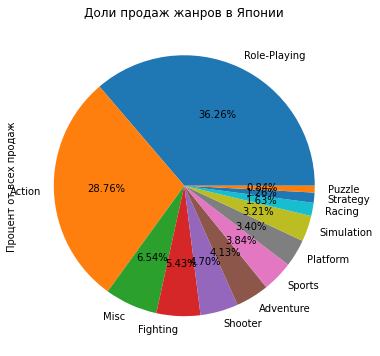

In [61]:
#найдем доли от  продаж жанров в Японии:

ratio_jp_genre=round((jp_sales_genre['jp_sales']/sum_jp_sales).mul(100),2)
ratio_jp_genre.plot(kind='pie', autopct='%1.2f%%', figsize =(6,6),subplots=True)
plt.title('Доли продаж жанров в Японии')
plt.ylabel('Процент от всех продаж')
plt.show();

Топ-5 жанров по продажам в Японии :`Role-Playing,Action,Misc,Sports,Platform`. Доля продаж жанра `Role-Playing` составляет 30%,данный жанр в Северной Америке  и в Европе продается не так хорошо, доля составляет 9% и 7% соответсвенно.

In [62]:
#построим сводную таблицу продаж в Японии в зависимости от рейтинга:
jp_sales_rating=new_data \
    .pivot_table(index='rating', values=['jp_sales'], aggfunc='sum') \
    .sort_values('jp_sales', ascending=False) 
jp_sales_rating

,jp_sales
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


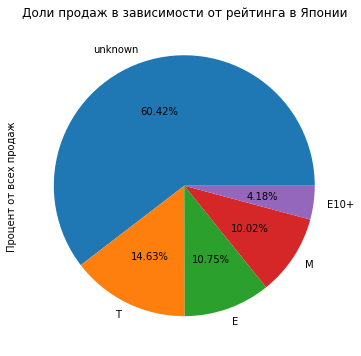

In [63]:
#найдем доли продаж  в Японии в зависимости о рейтинга:
ratio_jp_rating=round((jp_sales_rating['jp_sales']/sum_jp_sales).mul(100),2)
ratio_jp_rating.plot(kind='pie', autopct='%1.2f%%', figsize =(6,6),subplots=True)
plt.title('Доли продаж в зависимости от рейтинга в Японии')
plt.ylabel('Процент от всех продаж');


В Японии  60% продаж игр без рейтинга.На территории Японии действует собственная система рейтинга, и ESRB не является обязательным

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


,na_sales
genre,
Action,125.83
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.46
Platform,17.93
Fighting,15.55
Racing,12.96
Adventure,7.14


,na_sales
rating,
M,165.21
unknown,89.18
E,78.94
E10+,54.02
T,49.79


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


,eu_sales
genre,
Action,117.89
Shooter,87.86
Sports,60.49
Role-Playing,36.97
Racing,20.19
Misc,20.00
Platform,15.15
Simulation,10.84
Fighting,8.55


,eu_sales
rating,
M,145.32
E,82.97
unknown,78.61
E10+,42.53
T,41.95


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


,jp_sales
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


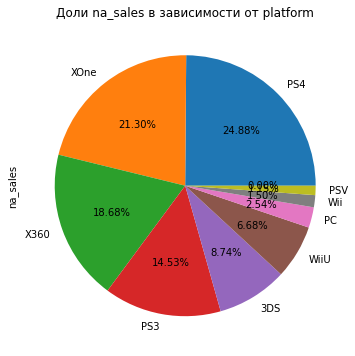

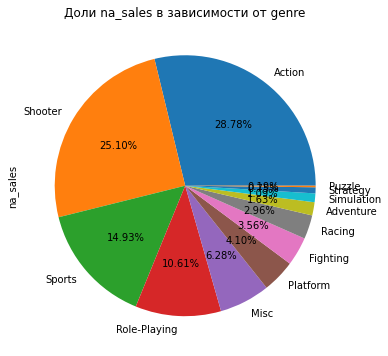

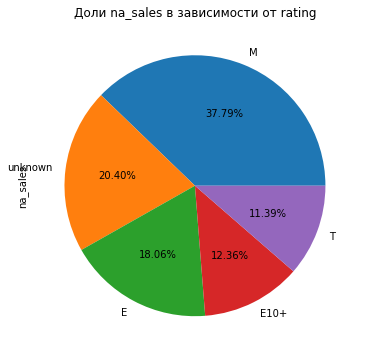

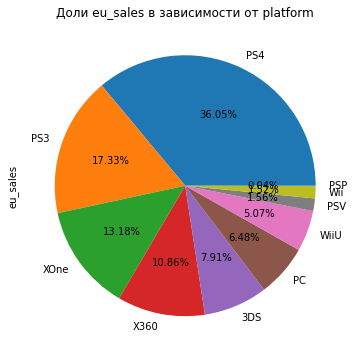

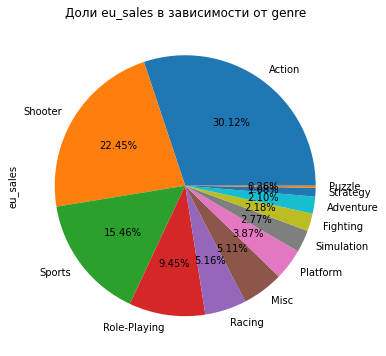

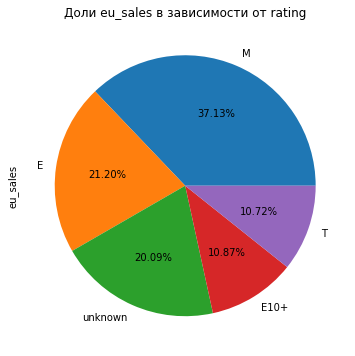

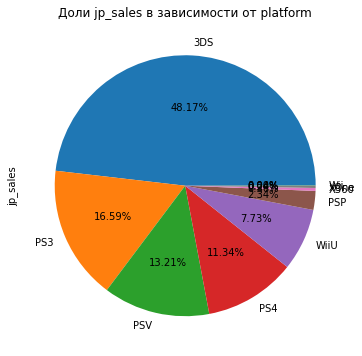

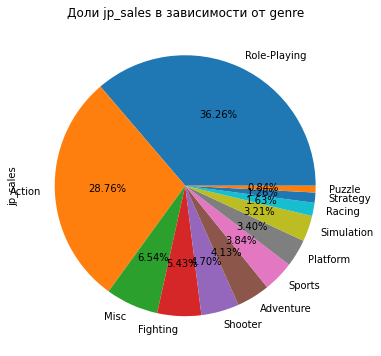

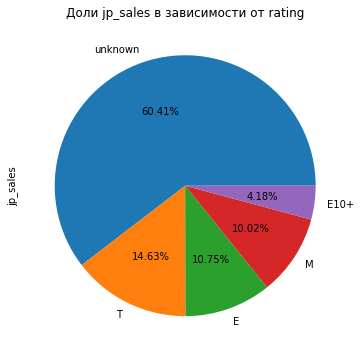

In [64]:
#КОД РЕВЬЮЕРА
sales=['na_sales','eu_sales','jp_sales']
columns=['platform','genre','rating']
for sale in sales:
    for column in columns:
        data_to_plot=new_data \
        .pivot_table(index=column, values=sale, aggfunc='sum') \
        .sort_values(sale, ascending=False)
        display(data_to_plot)
        data_to_plot.plot(kind='pie', autopct='%1.2f%%', figsize =(6,6),subplots=True,legend=None)
        plt.title(f"Доли {sale} в зависимости от {column}")

### Вывод
Портрет пользователя в NA:

Предпочтительные платформы:

X360,Wii,PS3,DS.

жанры:
Action,Sports,Shooter,Misc

Доли продаж по возрастному рейтингу ERSB  6+ (everyone) составляет 38 % от всех продаж.

Портрет пользователя в EU:

Предпочтительные платформы:

X360,Wii,PS3,DS

жанры: 

Action,Sports,Shooter,Misc

В Европе лучше всего продаются игры с  рейтингом 6+ (everyone) 36 %, так же хорошо продаются для возрастных категорий 15+ 32%.

Портрет пользователя в JP:

Продажи в Японии разительно отличаются от продаж в Северной Америке и в Европе, в Японии топ 5 популярных платформ DS,3DS,PS3, PSP,Wii

жанры: 
Role-Playing,Action,Misc,Sports

Доли продаж в Японии игр без рейтинга составляет 60%, что очень много.Может быть это обусловленно, что японцы выбирают игры не международного масштаба, а какие-то не очень популярные.

У Американцев и европейцев схожи предпочтения в выборе платформ для игр и жанров, японцы же отличатся при выборе и того и другого.



## Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевую гипотезу сформулируем следующим образом:
    
Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [65]:
new_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'PSP'], dtype=object)

In [66]:
# посчитаем средние пользовательские рейтинги платформы PC: 
new_data[new_data['platform']=="PC"]['user_score'].mean()

6.269677419354839

In [67]:
# посчитаем дисперсию платформы PC: 
new_data[new_data['platform']=="PC"]['user_score'].var()

3.035892752408881

In [68]:
# посчитаем средние пользовательские рейтинги платформы XOne: 
new_data[new_data['platform']=="XOne"]['user_score'].mean()

6.521428571428572

In [69]:
# посчитаем дисперсию платформы XOne: 
new_data[new_data['platform']=="XOne"]['user_score'].var()

1.9069968429360695

Критический уровень значимости возьмем 5 %, чтобы вероятность правильного вывода была в 95%. Укажем equal_var = False , так как дисперсии выборок  отличаются.

In [70]:
xone_platform=new_data.query('platform == "XOne"')['user_score']
pc_platform=new_data.query('platform == "PC"')['user_score']
alpha = .05

results = st.ttest_ind(
    xone_platform, 
    pc_platform,equal_var = False,nan_policy='omit')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


Принимаем Нулевую гипотезу H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевую гипотезу сформулируем следующим образом:
    
Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [71]:
# посчитаем средние пользовательские рейтинги жанра Action: 
new_data[new_data['genre']=="Action"]['user_score'].mean()

6.842783505154639

In [72]:
# посчитаем средние пользовательские рейтинги жанра Sports: 
new_data[new_data['genre']=="Sports"]['user_score'].mean()

5.238124999999999

In [73]:
# посчитаем дисперсию  жанра Action: 
new_data[new_data['genre']=="Action"]['user_score'].var()

1.7631777617944007

In [74]:
# посчитаем дисперсию  жанра Sports: 
new_data[new_data['genre']=="Sports"]['user_score'].var()

3.180612814465409

Критический уровень значимости возьмем 5 %, чтобы вероятность правильного вывода была в 95%. Укажем equal_var = False , так как дисперсии выборок отличаются.

In [75]:
action_genre=new_data.query('genre == "Action"')['user_score']
sports_genre=new_data.query('genre == "Sports"')['user_score']
alpha = .05

results = st.ttest_ind(
    action_genre, 
    sports_genre,equal_var = False,nan_policy='omit')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.1330204667098058e-20
Отвергаем нулевую гипотезу


Принимаем Альтернативную гипотезу H₁: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Общий Вывод

В рамках данной задачи были изучены данные , исправили в столбце 'user_score' оценки 'tbd' , заполним значениями NaN.

Поменяли типы данных в столбцах year_of_release на целочисленный, user_score на тип float.

Приведем названия колонок в общему нижнему регистру.

Исследовали данные и выявили, что значительный рост по выпуску игр наблюдается с 2000 по 2009 гг

Выяснили, что платформа в среднем живет 10 лет, продажи напрямую зависят от оценок критиков, а оценки пользователей не влияют на продажи.

Выделили топ-10 платформ по продажам ` PS4,PS3,XOne,3DS,X360,WiiU,PC,PSV,Wii,PSP`.

Лидируют жанры по продажам : `Shooter, Platform,Sports, Racing, Action`. Отстают в продажах `Puzzle, Adventur`. 
Составили портрет пользователя для регионов Северной Америки , Европы и Японии. У пользователей в Америке и в Европе схожи предпочтения в выборе платформ для игр и жанров, японцы же отличаются при выборе и того и другого.

Были проверены две гипотезы и выяснили, что
Средние пользовательские рейтинги платформ `Xbox One и PC` одинаковые.
Средние пользовательские рейтинги жанров `Action и Sports`  разные.